<a href="https://colab.research.google.com/github/skyeNAU/INF502_Project2_Group3/blob/main/Module%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import modules

In [3]:
#importing all the necessary packages
import requests
import csv
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sb
import numpy as np
import json
from datetime import datetime
import requests
from bs4 import BeautifulSoup
import re

## Define a class for GitHub Repository

In [4]:
# Define a class to represent a GitHub Repository
class GitHubRepository:
    def __init__(self, repo_name, owner, description, homepage, license, forks, watchers, date_of_collection):
        self.repo_name = repo_name
        self.owner = owner
        self.description = description
        self.homepage = homepage
        self.license = license  # License could be another class with its own attributes
        self.forks = forks
        self.watchers = watchers
        self.date_of_collection = date_of_collection

    def __str__(self):
        return f"{self.owner}/{self.repo_name}: {self.description} ({self.watchers})"

    def to_dict(self):
        return {
            "repo_name": self.repo_name,
            "owner": self.owner,
            "description": self.description,
            "homepage": self.homepage,
            "license": self.license,
            "forks": self.forks,
            "watchers": self.watchers,
            "date_of_collection": self.date_of_collection
        }

    def save_to_csv(self, file_path):
        with open(file_path, mode='w', newline='') as file:
            writer = csv.DictWriter(file, fieldnames=self.to_dict().keys())
            writer.writeheader()
            writer.writerow(self.to_dict())


In [5]:
url = 'https://api.github.com/repos/JabRef/jabref'

#http request to the URL and collecting it reponse
response = requests.get(url)

#the reponse data is converted json
data=response.json()

#print(json.dumps(data, indent=4))

repo_data = {
    "repo_name": data['name'],
    "owner": data['owner']['login'],
    "description": data['description'],
    "homepage": data['homepage'],
    "license": data['license'],
    "forks": data['forks'],
    "watchers": data['watchers'],
    "date_of_collection": datetime.now().timestamp()
}

my_repo = GitHubRepository(**repo_data)

# Access attributes of the repository object
#print(my_repo.forks)
#print(my_repo.license)
print(my_repo)

JabRef/jabref: Graphical Java application for managing BibTeX and biblatex (.bib) databases (3199)


## Define a class for PullRequests

In [6]:
# Define a class to represent Pull Requests from a GitHub Repository
class PullRequest:
    def __init__(self, title, number, body, state, date_of_creation, closing_date, user):
        self.title = title
        self.number = number
        self.body = body
        self.state = state
        self.license = license  # License could be another class with its own attributes
        self.date_of_creation = date_of_creation
        self.closing_date = closing_date
        self.user = user

    def __str__(self):
        return f"{self.number}: {self.title})"

    def to_dict(self):
        return {
            "title": self.title,
            "number": self.number,
            "body": self.body,
            "state": self.state,
            "date_of_creation": self.date_of_creation,
            "closing_date": self.closing_date,
            "user": self.user
        }

    def save_to_csv(self, file_path):
        with open(file_path, mode='w', newline='') as file:
            writer = csv.DictWriter(file, fieldnames=self.to_dict().keys())
            writer.writeheader()
            for pr in pullrequest_list:
                writer.writerow(pr.to_dict())


In [7]:
#saving jabref api in URl variable
url='https://api.github.com/search/issues?q=is:pr+repo:jabref/jabref'

#http request to the URL and collecting it reponse
response = requests.get(url)

#the reponse data is converted json
data=response.json()

#collecting title , pull request ,body , state, date of creation , closing date , user details of the repositories in respo.csv file
pullrequest_list = []
for i in data['items']: #collecting all responses from items key
    pr = PullRequest(i['title'],i['number'],i['body'],i['state'],i['created_at'],i['closed_at'],i['user']['login'])
    pullrequest_list.append(pr)

print(pullrequest_list[1])

10659: Add 'More' option to right click menu in the main table #9432)


## Define a class for user data

In [8]:
# Define a class to represent Users with PullRequests from the GitHub Repository
class UserList:
    def __init__(self, user, user_number_of_requests, user_repositories_count, user_follows, user_following, user_contributions):
        self.user = user
        self.user_number_of_requests = user_number_of_requests
        self.user_repositories_count = user_repositories_count
        self.user_follows = user_follows
        self.user_following = user_following  # License could be another class with its own attributes
        self.user_contributions = user_contributions

    def __str__(self):
        return f"{self.user} / Number of requests: {self.user_number_of_requests} / Repo count: {self.user_repositories_count} / Followers: {self.user_follows} / Following: {self.user_following} / Contibutions: {self.user_contributions}"

    def to_dict(self):
        return {
            "user": self.user,
            "user_number_of_requests": self.user_number_of_requests,
            "user_repositories_count": self.user_repositories_count,
            "user_follows": self.user_follows,
            "user_following": self.user_following,
            "user_contributions": self.user_contributions
        }

    def save_to_csv(self, file_path):
        with open(file_path, mode='w', newline='') as file:
            writer = csv.DictWriter(file, fieldnames=self.to_dict().keys())
            writer.writeheader()
            for user in userdata_list:
                writer.writerow(user.to_dict())


## From list of Pull Requests, get username and number of pull requests

In [9]:
# Function to extract user and pull request count
def extract_user_pull_request_count(pull_requests):
    user_pull_request_count = {}

    for pr in pull_requests:
        user = pr.user
        if user in user_pull_request_count:
            user_pull_request_count[user] += 1
        else:
            user_pull_request_count[user] = 1

    return user_pull_request_count

pullrequest_count = extract_user_pull_request_count(pullrequest_list)

## Scrape data from the user profile page on GitHub and populate UserList class

In [10]:
user_list = list(pullrequest_count.keys())

userdata_list = []
for username in user_list:
  user_pull_request_count = pullrequest_count[username]

  result = requests.get('https://github.com/' + username)
  content = result.content
  soup = BeautifulSoup(content, "html.parser")

  # Extract the required information
  repositories_count_element = soup.find('span', {'class': 'Counter'})
  repositories_count = repositories_count_element.text.strip() if repositories_count_element else 'N/A'

  if '[bot]' in username:
    followers_count = 'NA'
    following_count = 'NA'
    contributions = 'NA'
  else:
    try:
      followers_following = soup.find_all('span', {'class':"text-bold color-fg-default"})#.text.strip()
      followers_count = followers_following[0].text.strip()
      following_count = followers_following[1].text.strip()
    except:
      followers_count = 'NA'
      following_count = 'NA'

    contributions = soup.find('h2', {'class':"f4 text-normal mb-2"}).text.strip()
    contributions= re.split("\s", contributions)[0]

  ud = UserList(username,user_pull_request_count,repositories_count,followers_count,following_count,contributions)
  userdata_list.append(ud)

print(userdata_list[0])

yuyan-z / Number of requests: 1 / Repo count: 15 / Followers: 2 / Following: 3 / Contibutions: 385


## Use of .save_to_csv() function

In [11]:
# Save GitHubRepository data to CSV
repo_csv_file_path = 'github_repo_data.csv'
my_repo.save_to_csv(repo_csv_file_path)

# Save PullRequest data to CSV
pullrequest_csv_file_path = 'pullrequest_data.csv'
for pr in pullrequest_list:
    pr.save_to_csv(pullrequest_csv_file_path)

# Save UserData to CSV
userdata_csv_file_path = 'user_data.csv'
for ud in userdata_list:
    ud.save_to_csv(userdata_csv_file_path)

## Read data from .csv into data frames

In [12]:
repos_df = pd.read_csv('github_repo_data.csv')
pullreq_df = pd.read_csv('pullrequest_data.csv')
userdata_df = pd.read_csv('user_data.csv')

# repos_df.head()
pullreq_df.head()
# userdata_df.head()

,title,number,body,state,date_of_creation,closing_date,user
0,"[WIP] Handling non-ascii characters, related t...",10662,<!-- \r\nDescribe the changes you have made he...,open,2023-11-21T22:12:37Z,NaN,yuyan-z
1,Add 'More' option to right click menu in the m...,10659,Fixes [#9432](https://github.com/JabRef/jabref...,open,2023-11-21T19:15:14Z,NaN,theoo33
2,Clean up test code,10658,This enables rewrite of tests using OpenRewrit...,closed,2023-11-21T01:01:19Z,2023-11-21T08:37:58Z,koppor
3,"Replace cache: gradle with ""modern"" gradle-bui...",10657,Reasons at https://github.com/gradle/gradle-bu...,open,2023-11-21T00:51:05Z,NaN,koppor
4,App semantic scholar api key to properties,10656,<!-- \r\nDescribe the changes you have made he...,open,2023-11-20T20:39:47Z,NaN,Siedlerchr


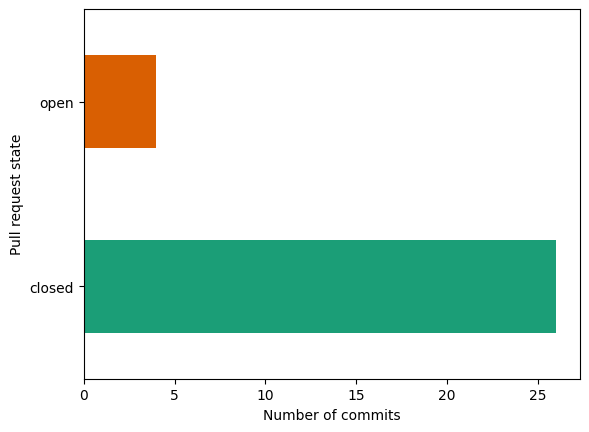

In [16]:
from matplotlib import pyplot as plt
import seaborn as sns
pullreq_df.groupby('state').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().set(xlabel='Number of commits', ylabel='Pull request state')
plt.show()

In [ ]:
#box plot that comapares closed vs open pulled requests in terms of additions
sb.set_style("whitegrid")
fig, ax = mp.subplots(figsize=(10, 6))
sb.boxplot(x = 'additions', y = 'commits', data = all_repos,ax=ax)

In [ ]:
#box plot that comapares closed vs open pulled requests in terms of deletions
sb.set_style("whitegrid")
fig, ax = mp.subplots(figsize=(10, 6))
sb.boxplot(x = 'deletions', y = 'commits', data = all_repos,ax=ax)

In [ ]:
#box plot that comapares closed vs open pulled requests in terms of deletions
sb.set_style("whitegrid")
fig, ax = mp.subplots(figsize=(10, 6))
sb.boxplot(x = 'user', y = 'changed_files', data = all_repos,ax=ax)

In [ ]:
#a scatterplot that showws the relationship between additions and deletions
all_repos.plot.scatter(x='additions', y='deletions', title= "Scatter plot between two variables X and Y");

mp.show(block=True);

In [ ]:
#line graph showing the total number of pull requests per day
repos_df.plot( 'date of creation' , 'number' )

In [ ]:
#bars comparing the number of users per repo
users_df.plot(x="number of repositories", y="number of followers", kind="bar")

In [ ]:
#corelation between all the numeric data in pull requests for a repo
print(all_repos.corr())

# plotting correlation heatmap
dataplot = sb.heatmap(all_repos.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
mp.show()

In [ ]:
#corelation between all the numeric data in pull requests for a repo
print(users_df.corr())

# plotting correlation heatmap
dataplot = sb.heatmap(users_df.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
mp.show()